In [1]:
from matplotlib import pyplot as plt

from experiments.evaluation_flow.shared import GOOGLENET
from experiments.plots.util import *

In [2]:
TOTAL_CONSUMPTIONS = 'total-consumptions'
ROOT_LOG_DIR = '/Users/nils/Downloads/log-dir'
all_files = all_files_in_dir(ROOT_LOG_DIR)

server_files = [f for f in all_files if 'server' in f]

In [3]:
server_files_and_meta = [(extract_file_meta(f), f) for f in server_files]

In [4]:
server_files_and_meta = [({**f[0], **{'u_ids': use_case_ids(f[1])}}, f[1]) for f in server_files_and_meta]

In [5]:
storage_meta = []
for f in server_files_and_meta:
    use_case_id_dict = f[0]['u_ids']
    consumptions = {}
    total_consumptions = {}
    for use_case in use_case_id_dict.keys():
        s_info = storage_info(f[1], use_case_id_dict[use_case])
        consumptions[use_case] = s_info
        total_consumptions[use_case] = total_storage_consumption(s_info)

    f[0].update({'consumptions': consumptions, TOTAL_CONSUMPTIONS: total_consumptions})
    storage_meta.append(f[0])

In [6]:
def filter_meta(to_filter, model, approach, snapshot_type, snapshot_dist, run):
    result = [f for f in to_filter]
    if model:
        result = [f for f in result if f['model'] == model]
    if approach:
        result = [f for f in result if f['approach'] == approach]
    if snapshot_type:
        result = [f for f in result if f['snapshot_type'] == snapshot_type]
    if snapshot_dist:
        result = [f for f in result if f['snapshot_dist'] == snapshot_dist]
    if run:
        result = [f for f in result if f['run'] == run]

    assert len(result) == 1
    return result[0]

In [7]:
def plot_single_storage_consumption(meta, save_path=None):
    plt.rc('font', size=12)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    cons = meta[TOTAL_CONSUMPTIONS]
    use_cases = list(cons.keys())
    values = [c * 10**-6 for c in list(cons.values())] # byte -> Mb
    ax.bar(use_cases, values)
    ax.set_ylabel('Storage consumption in Mb')
    ax.set_xlabel('Use case')
    plt.xticks(rotation=45)
    if save_path:
        fig.savefig(save_path, bbox_inches='tight')

    plt.show()

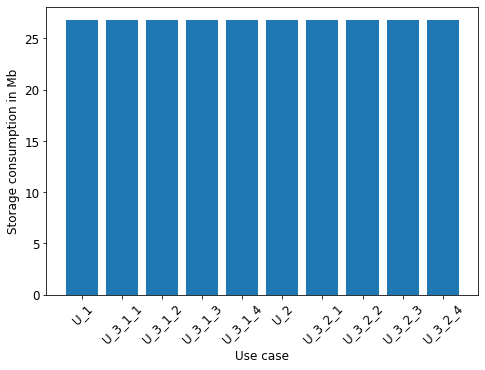

In [8]:
c = filter_meta(storage_meta, model=GOOGLENET, approach='baseline', snapshot_type='version', snapshot_dist='food',
                run='0')
plot_single_storage_consumption(c)

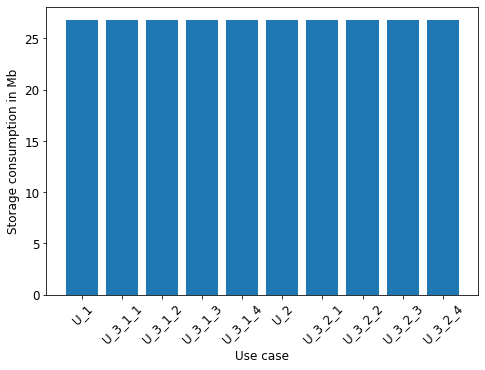

In [9]:
c = filter_meta(storage_meta, model=GOOGLENET, approach='param_update', snapshot_type='version', snapshot_dist='food',
                run='0')
plot_single_storage_consumption(c)

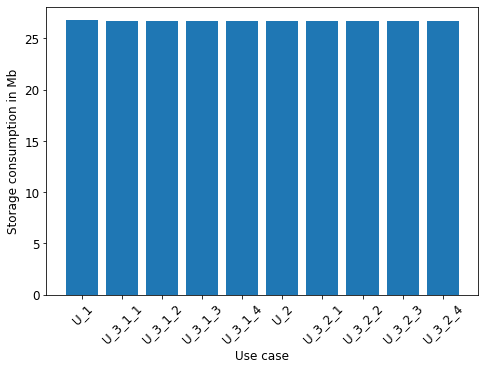

In [10]:
c = filter_meta(storage_meta, model=GOOGLENET, approach='param_update_improved', snapshot_type='version', snapshot_dist='food',
                run='0')
plot_single_storage_consumption(c)

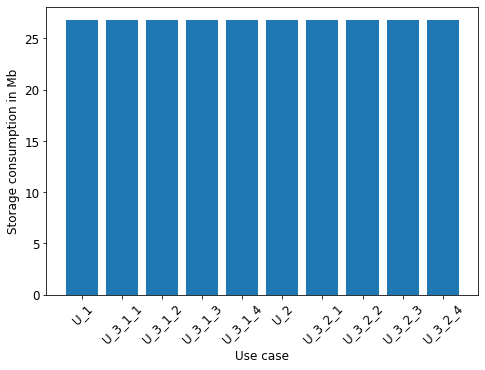

In [11]:
c = filter_meta(storage_meta, model=GOOGLENET, approach='baseline', snapshot_type='fine-tuned', snapshot_dist='food',
                run='0')
plot_single_storage_consumption(c)

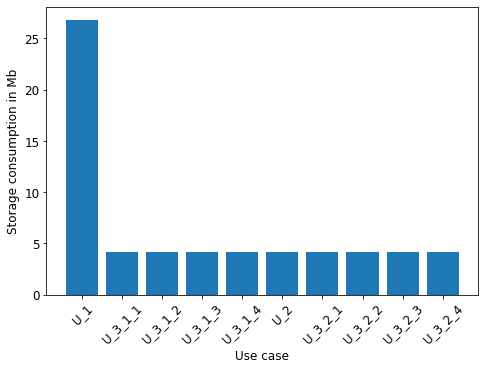

In [12]:
c = filter_meta(storage_meta, model=GOOGLENET, approach='param_update', snapshot_type='fine-tuned', snapshot_dist='food',
                run='0')
plot_single_storage_consumption(c)

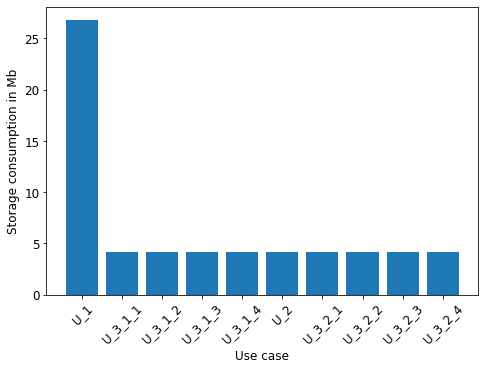

In [13]:
c = filter_meta(storage_meta, model=GOOGLENET, approach='param_update_improved', snapshot_type='fine-tuned', snapshot_dist='food',
                run='0')
plot_single_storage_consumption(c)
